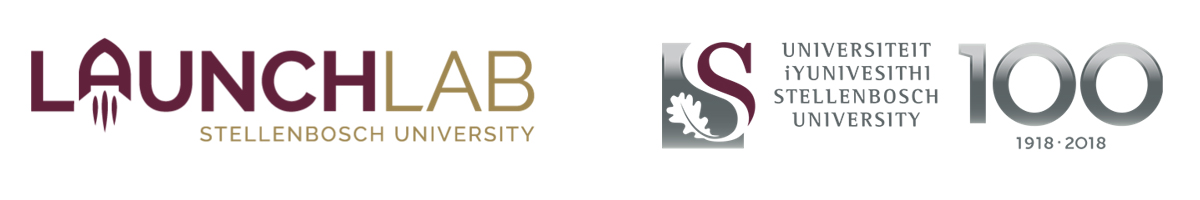

# Assignment \#7: Unsupervised Learning

In [32]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn import datasets

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# install scikit image to import the following package
from skimage import io, color

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import NMF
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from IPython.display import Image
!pip install mglearn

## Dimensionality reduction

We start of by doing PCA on the Iris dataset. This dataset represents measurements of 150 iris flowers, along with a response variable (target) indicating which of three iris species each set of measurements corresponds to. Once the data is loaded, these species (classes) are simply 0, 1, and 2.

The recorded attributes for an iris flower:

1. sepal length in cm

2. sepal width in cm

3. petal length in cm

4. petal width in cm

In [33]:
# Load dataset
iris_data = load_iris()
data = iris_data.data
labels = iris_data.target
classes = set(labels)
target_names = iris_data.target_names
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

## Explore the dataset by plotting the sepal length against the sepal width.
Label the points according to their species.

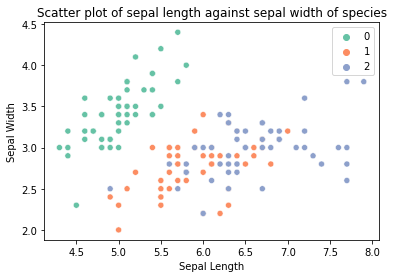

In [55]:
# Insert code#
#sns.scatterplot(data = data, x=sepal_length, y="sepal_width")
sns.scatterplot(x=data[:,0], y=data[:,1], hue= iris_data.target, data=data, palette = 'Set2')
#sns.scatterplot(data=data, x=data[:, 0], y=data[:, 1], hue = labels, palette = "Set2")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter plot of sepal length against sepal width of species')
plt.show()


## Next, the data is fitted with PCA. 
First we fit with 3 principal components in order to investiage how much of the variance is explained by the components. 

Explain the meaning of the graph below.

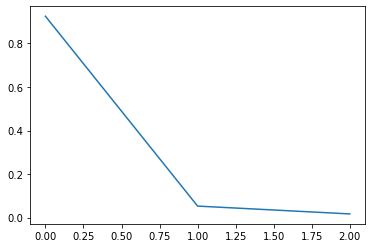

In [36]:
pca = PCA(n_components=3)
pca.fit(data)
plt.plot(pca.explained_variance_ratio_)
plt.show()

The PCA graph shows how, as the principle component number increases, there is a reduction in the percentage of variance (here shown as a ratio) that is explained by the components. 

## Project the data onto the first two principal components 
Plot the 2-dimensional representation of the 3 classes in different colours. 

Your output should look similar to the image below.

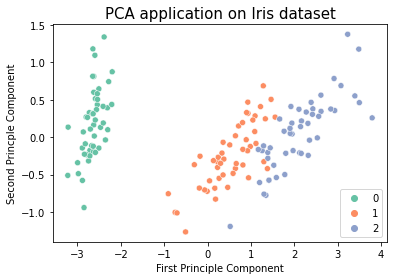

In [58]:
from sklearn.decomposition import PCA
    
myPCA = PCA(n_components =2)
#fitting the pca model to iris data   
pca = myPCA.fit(data)

#transforming the data onto first two components
trans_data = pca.transform(data)    
sns.scatterplot(x = trans_data[:,0], y = trans_data[:,1], hue = iris_data.target, palette = 'Set2')
plt.xlabel("First Principle Component",fontsize=10)
plt.ylabel("Second Princple Component",fontsize=10)
plt.title("PCA application on Iris dataset",fontsize=15)
plt.show()

# Example output
display(Image(filename="src/iris_pca.png"))

In [39]:
display(Image(filename="src/iris_pca.png"))

Here we can see how much class separation is obtained by projecting onto the first two principal components. 

Calcualte the percentage information loss. [1 point]

Comment on whether you think this is a good projection. [2 points]

In [ ]:
# Calculate % information lost

This is a relatively good projection as it gives a better overview of the layout of the dataset than the simple scatterplot. The clear distinction between the various classes (by corrolation to one another) as seen by their seperation in this 2D space indicate that even a linear line through this plot would be able to seperate the classes rather well.


## Now use t-SNE to visualise iris dataset in 2-dimensional space.

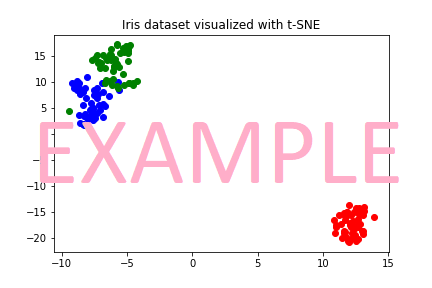

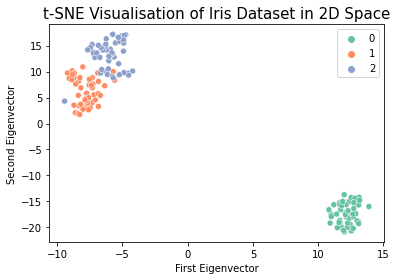

In [61]:
# Import library
from sklearn.manifold import TSNE

##use fit_transform instead of fit since tsne doens't have transform method:
tsne = TSNE(n_components = 2, random_state = 1)
tsne_trans = tsne.fit_transform(data)

sns.scatterplot(data=tsne_trans, x=tsne_trans[:, 0], y=tsne_trans[:, 1], hue = iris_data.target, palette = "Set2")
plt.xlabel("First Eigenvector",fontsize=10)
plt.ylabel("Second Eigenvector",fontsize=10)
plt.title("t-SNE Visualisation of Iris Dataset in 2D Space",fontsize=15)


#plt.scatter(x= tsne_trans[:,0], y= tsne_trans[:,1])
#plt.xlim(tsne_trans[:,0].min(), tsne_trans[:,0].max()+1)
#plt.ylim(tsne_trans[:,1].min(), tsne_trans[:,1].max()+1)   

display(Image(filename="src/iris_tsne.png"))

In [ ]:
# Insert code produce a similar graph

## Discuss the main differences between PCA and t-SNE that leads to the two different plots.

The different plots are as a result of the different methods that PCA and t-SNE employ in arranging the data. Firstly, PCA preserves the global structure (and t-SNE the local structure) of the different datapoints. Therefore, t-SNE paints a clearer picture when it comes to the cluster of the data compared to the PCA plot, where the different classes are plotted in relatively close proximity to one another. 

## Clustering

Complete the class to implement the K-means algorithm.

## Function "fit()" 
Takes in d-dimensional data and applies the EM step to find and print the cluser centroids.

Initialize your means with random samples.

## Function "predict()"
Takes in a set of observations and predicts their labels based on the nearest cluster centroids.

Returns a list of predicted labels

In [ ]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
      
    def predict(self,data):
        

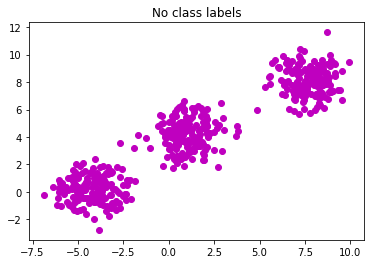

In [62]:
n_samples = 500
blobs = datasets.make_blobs(n_samples=n_samples, random_state=3)
blobs_data = blobs[0]
blobs_labels = blobs[1]

plt.title("No class labels")
plt.scatter(x=blobs_data[:,0], y=blobs_data[:,1], c="m")
plt.show()

## Apply your K-Means algorithm to the random generated dataset above
Plot the data, assigning a different colour to each cluster. 

Your result should look something like the image below.

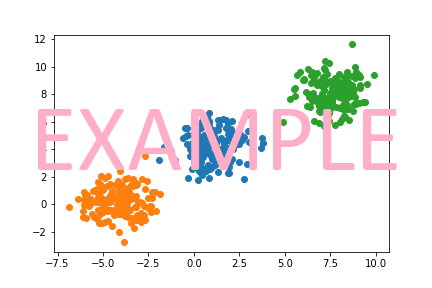

In [68]:

    
# Example output
display(Image(filename="src/my_pca.png"))

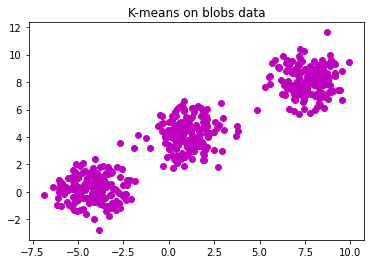

In [70]:
# Apply K-means on blobs_data


km_blob = KMeans(n_clusters=2, random_state =0)
km_blobs = km_blob.fit(blobs_data)
clusters = km_blobs.predict(blobs_data)

plt.title("K-means on blobs data")
plt.scatter(x=blobs_data[:,0], y=blobs_data[:,1], c="m")
plt.show()

## Given the data distibution below, perform K-Means 
Use your own library or the scikit-learn implementation and plot the data showing the two clusters.

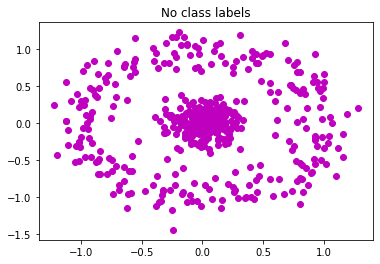

In [72]:
# Generate noisy cirlces
n_samples = 500
circles = datasets.make_circles(n_samples=n_samples, factor=.05, noise=.15, random_state=1)
circles_data = circles[0]
circles_labels = circles[1]

plt.title("No class labels")
plt.scatter(x=circles_data[:,0], y=circles_data[:,1], c="m")
plt.show()

Text(0.5, 1.0, 'KMeans on Noisy Data')

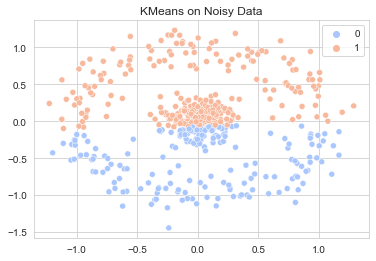

In [98]:
# Insert code for K-means on noisy circles

km_noisy = KMeans(n_clusters=2, random_state =0)
km_noisy.fit(circles_data)
clusters = km_noisy.predict(circles_data)


sns.scatterplot(data=circles_data, x=circles_data[:, 0], y=circles_data[:, 1], hue = clusters, palette= "coolwarm")
plt.title('KMeans on Noisy Data')

## Comment on what you observe.
The two clusters are split along the y-axis at the zero mark, whereas they can be positive or negative along the horizontal axis. There is a clear distinction between the two clusters. 

## Now use DBSCAN clustering on the same data. 
Again, plot the result showing the cluster seperation. 

Hint: You need to tune the eps value. 

Your result should like something like the image below.

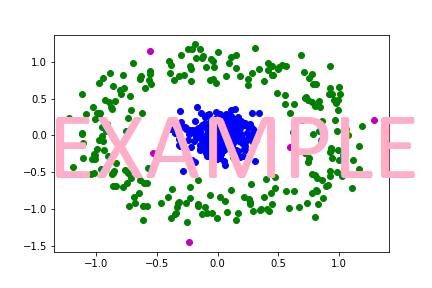

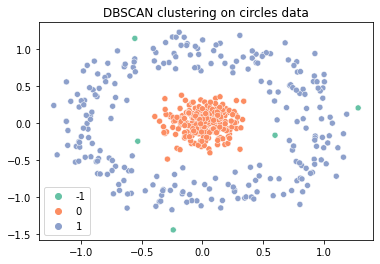

In [74]:
import mglearn
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2)
clusters = dbscan.fit_predict(circles_data)
sns.scatterplot(data=circles_data, x=circles_data[:, 0], y=circles_data[:, 1], hue = clusters, palette = "Set2")
plt.title('DBSCAN clustering on circles data')
plt.legend()
# Example output
display(Image(filename="src/dbscan.png"))

## Discuss the pros and cons for KMeans and DBSCAN.

KMeans Pros: KMeans is rather easy to implement and can generalise well to taking in larger sets of data too. It is also easy to interpret the visualisation of the results on a plot. 
KMeans Cons: choosing the clusers to find the optimal value can be time consuming. Outliers may be a cluster of their own, or otherwise pull centroids in a direction they would otherwise not have been. 


DBSCAN Pros: Opposite to KMeans, we do not have to specify the number of clusters beforehand. 
DBSCAN Cons: The type of distance measure used in DBSCAN can significantly alter the performance of the clustering. It does also not perform optimally with high dimensional data. 

## Image compression Using dimension reduction


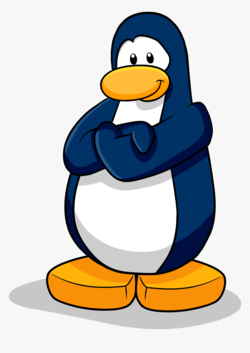

In [2]:
display(Image(filename="src/penguin.png"))

Note that the colors in the image above are clustered around only a few colors (whose values are stored in numerical variables). 

## Using the k-means algorith find the clusters and reprodue the image using only 4 colours (k=4). 

The result looks something like the image below.

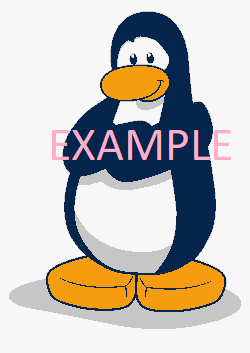

In [3]:
display(Image(filename="src/penguin_compressed.png"))

In [75]:
# Load image
image = io.imread("src/penguin.png")
# Convert from rgba to rgb
image = color.rgba2rgb(image)
print(image)
# Show image dimension
print(image.shape)

[[[0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]
  ...
  [0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]]

 [[0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]
  ...
  [0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]]

 [[0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]
  ...
  [0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]]

 ...

 [[0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]
  ...
  [0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]]

 [[0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]


(353, 250, 3)
rbg as numpy (353, 250, 3)
reshaped again (88250, 3)


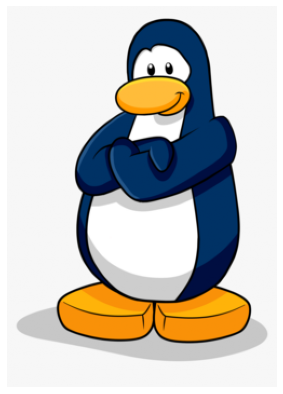

In [88]:
# Insert code here
from sklearn.cluster import KMeans
original = np.asarray(image)

#check shape of rbg
print(image.shape)
#seperate each of them
a,b,c = original.shape
print('rbg as numpy', original.shape)

#3 colums for the pixels
reshaped_array = original.reshape(a*b,c)
print('reshaped again', reshaped_array.shape)

#guess cluster as my algorithm doesn't work and need n for built-in kmeans function
n_clusters = 80
k_means = KMeans(n_clusters = n_clusters)
k_means.fit(reshaped_array)
colours = k_means.cluster_centers_
cluster_label = k_means.labels_

mooi_penguino = reshaped_array.reshape(a,b,c)

plt.figure(figsize = (7,7))
plt.axis('off')
plt.imshow(mooi_penguino)
plt.show()

## Print the number of clusters required for a perfect reproduction.

In [12]:
# Insert code

#guessed by how blurry the penguin was
print('n_clusters = 80')

n_clusters = 50


## Hierarchical clustering
Now we will be performing hierarchical clustering on shopping data. 

The goal is to divide customers into dfferent groups based on their shopping trends. 

The data is located in "shopping-data.scv". First, let us explore the data.

In [89]:
# Load the data
customer_data = pd.read_csv("src/shopping-data.csv")

# Explore data
customer_data.shape
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender. 

## Extract the "Annual Income (k$)" and "Spending Score" columns as a two-dimensional numpy array. 
Print the first row

In [90]:
# Insert code to extract relevant data from relevant columns

df1 = customer_data['Annual Income (k$)']
df2 = customer_data['Spending Score (1-100)']

df = pd.concat([df1, df2], axis =1)

print(df)

my_numpy = df.to_numpy()
print(my_numpy[0,1])

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]
39


## Perform hierarchical clustering on the data
Plot the results in a dendogram.

Hint: use the scipy package imported shc

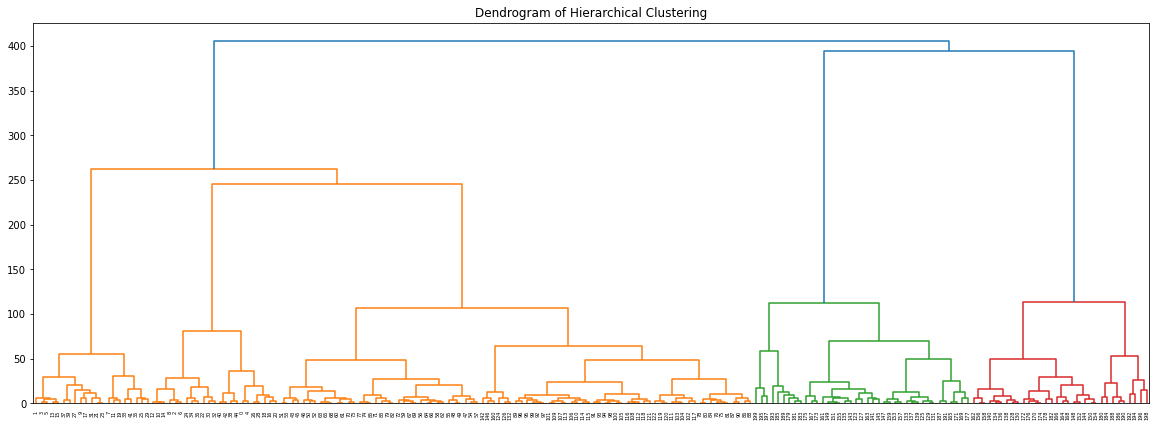

In [92]:
# Insert code here
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, ward

plt.figure(figsize=(20, 7))  
plt.title("Dendrogram of Hierarchical Clustering")  
my_dendogram = shc.dendrogram(shc.linkage(my_numpy, method='ward'))

## Determine the number of clusters in which to split the data 
Thereafter, assign a cluster label to each data point (Using AgglomerativeClusting()).

Hint: The ideal number of clusters is present at a height of 150-200 in the dendogram.

In [93]:
# Insert code here
from sklearn.cluster import AgglomerativeClustering
#set number of clusters to 5 given dendogram
agg = AgglomerativeClustering(n_clusters = 5)
assignment = agg.fit_predict(my_numpy)
print(assignment)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Plot "Annual Income (k$)" vs "Spending Score" clearly labeling the clusters.

Text(0.5, 1.0, 'Annual Income vs Spending Score')

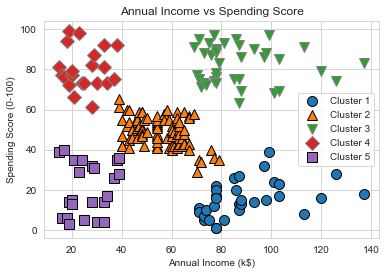

In [96]:
# Insert code here
mglearn.discrete_scatter(my_numpy[:, 0], my_numpy[:, 1], assignment)
plt.legend(["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"], loc="best")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (0-100)")
plt.title("Annual Income vs Spending Score")

## Identify two clusters of people you would target. Give a reason for your answer.

Firstly, cluster 3 would be targeted. This is because the cluster of consumers have both the ability to spend, reflected by high annual incomes, as well as high willingness to spend, as reflected by their high spending score. 
The second cluster to target would be cluster 2. This is because their willingness to spend is relatively proportional to their annual income. 

Cluster 1, though presening with relatively high annual income, would not necessarily be targeted becuase there would have to be an incentive scheme put in place that encourages higher spending. From this plot, it can be presumed that these are conservative or prudent spenders compared to cluster3, which have similar income levels but are more liberal with spending as reflected by their spending scores. 

## Non-negative matrix factorization
Let's apply NMF, using the tf-idf word-frequency array of Wikipedia articles. 

First explore the data. 

The data consist of a list of article titles and a list of words. The tf-idf word frequency of each word is given in a csr matrix called articles.

In [97]:
df_articles = pd.read_csv('src/Wikipedia articles/wikipedia-vectors.csv', index_col=0)

# articles in csr matrix format
articles = csr_matrix(df_articles.transpose())
# article titles
titles = list(df_articles.columns)
# article keywords
words = pd.read_csv('src/Wikipedia articles/wikipedia-vocabulary-utf8.txt', header=None).iloc[:, 0].tolist()

# For visualization
# Use raw (non csr matrix)
raw_articles = df_articles.transpose()
df = pd.DataFrame(raw_articles, index=titles)
df.columns = words
df


,aaron,abandon,abandoned,abandoning,abandonment,abbas,abbey,abbreviated,abbreviation,abc,...,zealand,zenith,zeppelin,zero,zeus,zimbabwe,zinc,zone,zones,zoo
HTTP 404,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
Alexa Internet,0.000000,0.00000,0.029607,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
Internet Explorer,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.003772,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.011594,0.000000,0.0
HTTP cookie,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
Google Search,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.006649,0.0
Tumblr,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
Hypertext Transfer Protocol,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
Social search,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
Firefox,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.031222,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
LinkedIn,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


## Now fit and transform the articles. First, create an NMF instance using 6 components.

In [ ]:
# Insert code here 
nmf = NMF(n_components=6, random_state=1)

## Now fit the model to articles and transform to obtain the nmf_features.


In [ ]:
# Insert code here
nmf.fit(articles)
nmf_features = nmf.fit_transform(articles)

#checking dimensions
print(articles.shape)
print(nmf_features.shape)
print(nmf.components_.shape)

## Put the features in a pandas dataframe using the article titles as index.

In [ ]:
# Insert code here
newdf = pd.DataFrame(nmf_features, index = titles)
newdf

## Now that you have the features, display the 6 components for article with title "Zlatan Ibrahimović". 

In [ ]:
# Insert code
display(newdf.loc["Zlatan Ibrahimović"])

## Now display the 6 components for article with title "Neymar". 

In [ ]:
# Insert code
display(newdf.loc["Neymar"])

What do you observe? Explain what this mean.

Answer: In both instances, the second component is the highest value in the above displayed components. It is also valued significantly higher than the other components in the first 6. 

Verify your assumption above by identifying the corresponding NMF components (i.e. the words that both articles have in common)

In [ ]:
# Insert code here

